In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelBinarizer
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
train_data=pd.read_csv('../input/train.csv')
test_data=pd.read_csv('../input/test.csv')
train_data.shape

(891, 12)

In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

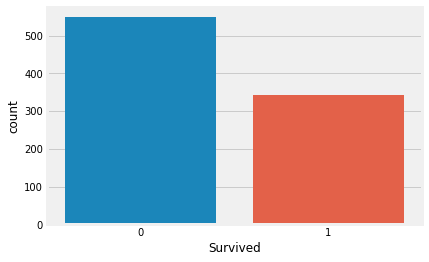

In [54]:
sb.countplot('Survived',data=train_data)

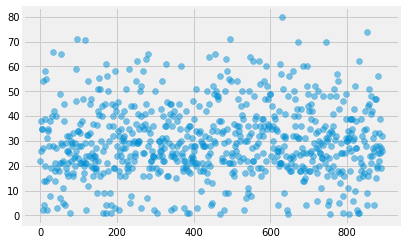

In [55]:
plt.scatter(train_data['PassengerId'],train_data['Age'],alpha=0.5)

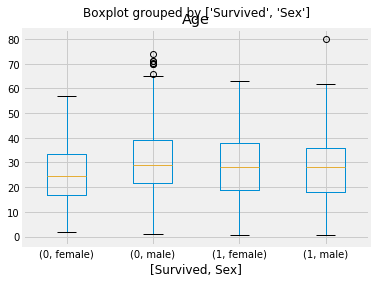

In [56]:
train_data.boxplot(column='Age',by=['Survived', 'Sex'])

In [57]:
one_hot = LabelBinarizer()
one_hot.fit_transform(train_data['Sex'])

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

One hot encoding joined back to the main data file in a form of matrix (Sex)

In [58]:
o_t = pd.get_dummies(train_data['Sex'])
train_data=train_data.drop('Sex',axis = 1)
train_data=train_data.join(o_t)
train_data.head(100)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.00,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.00,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.00,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.00,0,2,347742,11.1333,NaN,S,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.00,1,0,237736,30.0708,NaN,C,1,0


There're some missing values of age. Hence, one approach is to use median value for age.
We need to extract the Title from name, so we can compute the mean value of age based on titles. We can apply a regular expression to extract the title from the Name column.

In [59]:
df = pd.concat([train_data, test_data], axis=0, sort=True)
# create new Title column
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,female,male,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,NaN,1,0.0,A/5 21171,0.0,1.0,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,NaN,1,1.0,PC 17599,1.0,0.0,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,NaN,0,1.0,STON/O2. 3101282,1.0,0.0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,NaN,1,1.0,113803,1.0,0.0,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,NaN,0,0.0,373450,0.0,1.0,Mr


Now, we will count the Title values.

In [60]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Lady          1
Capt          1
Jonkheer      1
Mme           1
Countess      1
Sir           1
Don           1
Dona          1
Name: Title, dtype: int64

Combine these to categories.

In [61]:
# replace rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)
# confirm that we are left with just six values
df['Title'].value_counts()

Mr        767
Miss      264
Mrs       201
Master     61
Rev         8
Dr          8
Name: Title, dtype: int64

For each missing age value, we will impute the age using the median age for all people with the same title.

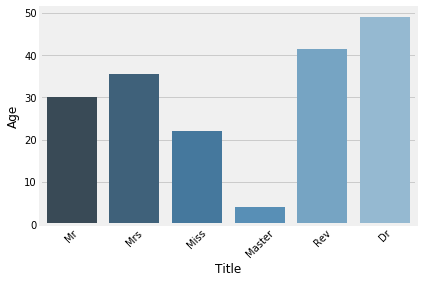

In [62]:
# impute missing Age values using median of Title groups
title_ages = dict(df.groupby('Title')['Age'].median())

# create a column of the average ages
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
df['Age'].fillna(df['age_med'], inplace=True, )
del df['age_med']

# then visualize it
sns.barplot(x='Title', y='Age', data=df, estimator=np.median, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

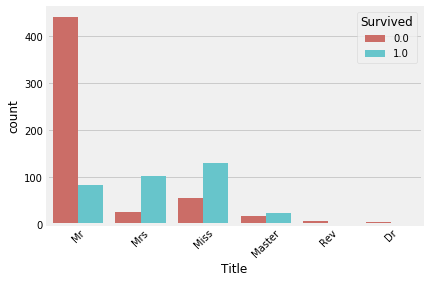

In [63]:
sns.countplot(x='Title', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()